<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

DATA COLUMNS:
marketplace       - 2 letter country code of the marketplace where the review was written.\
customer_id       - Random identifier that can be used to aggregate reviews written by a single author.\
review_id         - The unique ID of the review.\
product_id        - The unique Product ID the review pertains to. In the multilingual dataset the reviews\
for the same product in different countries can be grouped by the same product_id.\
product_parent    - Random identifier that can be used to aggregate reviews for the same product.\
product_title     - Title of the product.\
product_category  - Broad product category that can be used to group reviews\
(also used to group the dataset into coherent parts).\
star_rating       - The 1-5 star rating of the review.\
helpful_votes     - Number of helpful votes.\
total_votes       - Number of total votes the review received.\
vine              - Review was written as part of the Vine program.\
verified_purchase - The review is on a verified purchase.\
review_headline   - The title of the review.\
review_body       - The review text.\
review_date       - The date the review was written.

DATA FORMAT \
Tab ('\t') separated text file, without quote or escape characters. \
First line in each file is header; 1 line corresponds to 1 record. \

In this assignment, you have to demonstrate:

How to load and prepare text for modeling. \
How to develop a RNN for text classification sentiment analysis with Tensorflow and improve model performance.

Criteria - Meet Expectations
Text Classification Model - Mengimplementasikan RNN dengan Tensorflow untuk membuat Text Classification model
Preprocessing - Student Melakukan Preproses Dataset Sebelum Membuat Model.
Apakah Kode Berjalan Tanpa Ada Eror? - Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

# Load Data & Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re

%matplotlib inline

In [ ]:
# import gzip

# with gzip.open('dataset/amazon_reviews_us_Books_v1_02.tsv.gz','r') as fin:        
#     for line in fin:        
#         print('got line', line)

In [3]:
import pandas as pd

# df = pd.read_csv('dataset/amazon_reviews_us_Watches_v1_00.tsv.gz', sep='\t', header=0)
df = pd.read_csv('dataset/amazon_reviews_us_Watches_v1_00.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

In [5]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960199,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,N,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13
960200,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,N,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08
960201,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,N,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06
960202,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,N,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05


In [7]:
df[df['star_rating'] > 3].head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31
5,US,6576411,RA51CP8TR5A2L,B00EYSOSE8,230493695,Casio Men's GW-9400BJ-1JF G-Shock Master of G ...,Watches,5,0,0,N,Y,No complaints,"i love this watch for my purpose, about the pe...",2015-08-31


In [8]:
df['review_body'][df['star_rating'] > 3]

0         Absolutely love this watch! Get compliments al...
1              I love this watch it keeps time wonderfully.
3         It works well on me. However, I found cheaper ...
4         Beautiful watch face.  The band looks nice all...
5         i love this watch for my purpose, about the pe...
                                ...                        
960198    This HRM is pretty darn accurate...I tested my...
960200    Well worth the price. This is a light weight, ...
960201    Dear Targeteers,<BR>This watch is exelent. it ...
960202    In the old days, the common hearing battery in...
960203    I have found that a #393 watch battery is the ...
Name: review_body, Length: 743954, dtype: object

In [10]:
df = df.where(pd.notnull(df), "")

In [11]:
df.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

### Combine Review Body & Head

In [12]:
df['all_review'] = df['review_headline']+" "+df['review_body']

## Preprocess Data

In [13]:
from collections import defaultdict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [88]:
def preprocess(sent):
    
    sent = str(sent).lower()
    sent = re.sub(r'^<div id="video.*>&nbsp;', '', sent) # Video-review part
    sent = re.sub('https?://[A-Za-z0-9./]+', '', sent) # URLs
    
    # Remove HTML Tag
    sent = re.sub('<.*?>', '', sent)    
    
    # Remove everything in bracket    
    sent = re.sub('\[[^)]*\]', '', sent)    
    
#     for k in emoticon_repl:
#         sent = re.sub(k, emoticon_repl[k], sent)
    
    sent = re.sub('[/]+', ' ', sent) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    sent = re.sub('[^A-Za-z0-9-_ ]+', '', sent)

    # Remove words that are digits only
    sent = re.sub('\b\d+\b', '', sent)                
    
    return sent

###  Apply Preprocess

In [99]:
df['clean_all_review'] = df['clean_all_review'].apply(preprocess)

In [100]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,all_review,clean_all_review
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,five stars absolutely love this watch get comp...,five stars absolutely love watch get complimen...
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,i love thiswatch it keeps time wonderfully i l...,love thiswatch keeps time wonderfully love wat...
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31,two stars scratches,two stars scratches
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,five stars it works well on me however i found...,five stars works well however found cheaper pr...
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,beautiful face but cheap sounding links beauti...,beautiful face cheap sounding links beautiful ...


### Remove Stopwords & Save to File

In [11]:
len_df = len(df)

In [27]:
# TAKES LONG TIME TO PROCESS

from IPython.display import display, clear_output
import time

start = 960203
end   = 960205
t1 = time.time()
for entry in df['all_review'][start:end]:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english')]    
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_all_review'] = res
    if start >= end:
        break
    start = start+1
    
df.to_csv('amazon_reviews_us_Watches_vcleanv03.csv')
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9998959 - 960203'

Duration: 37.53s


500 loop - Duration: 76.76s

In [25]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,all_review,clean_all_review
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,five stars absolutely love this watch get comp...,five stars absolutely love watch get complimen...
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,i love thiswatch it keeps time wonderfully i l...,love thiswatch keeps time wonderfully love wat...
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31,two stars scratches,two stars scratches
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,five stars it works well on me however i found...,five stars works well however found cheaper pr...
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,beautiful face but cheap sounding links beauti...,beautiful face cheap sounding links beautiful ...


In [4]:
start = 960203
end   = 960205

# df.to_csv('amazon_reviews_us_Watches_vcleanv03.csv')
df[['all_review','clean_all_review']][start-8:start+5]

# df[497387-5:497387+5]
# df[['all_review','clean_all_review']][746000-5:746000+5]
# df.iloc[497388]

,all_review,clean_all_review
960195,this is not a cool item this item is very cool...,cool item item cool looking comfortable deciev...
960196,it takes a licking ive been very pleased with ...,takes licking ive pleased new timex expedition...
960197,adorable but fragile the 13 year old girl i bo...,adorable fragile 13 year old girl bought loves...
960198,great for interval training this hrm is pretty...,great interval training hrm pretty darn accura...
960199,great prize - but size its a great watch - but...,great prize - size great watch - dont chance c...
960200,a very classy watch well worth the price this ...,classy watch well worth price light weight cla...
960201,this is a great watch dear targeteersthis watc...,great watch dear targeteersthis watch exelent ...
960202,now watt a minute here in the old days the com...,watt minute old days common hearing battery pa...
960203,1 10 watt difference for hearing aids i have f...,1 10 watt difference hearing aids found 393 wa...


### Reload Preprocessed Data

In [16]:
df = pd.read_csv('amazon_reviews_us_Watches_vcleanv03.1.csv', index_col=0, low_memory=False)

In [17]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,all_review,clean_all_review,positive
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,five stars absolutely love this watch get comp...,five stars absolutely love watch get complimen...,True
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,i love thiswatch it keeps time wonderfully i l...,love thiswatch keeps time wonderfully love wat...,True
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31,two stars scratches,two stars scratches,False
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,five stars it works well on me however i found...,five stars works well however found cheaper pr...,True
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,beautiful face but cheap sounding links beauti...,beautiful face cheap sounding links beautiful ...,True


In [ ]:
X=df.all_review.values
y=df.star_rating > 3

def check_presence(regex, stop = 1, verbose = True):
    j = 0
    tv = False
    for i in range(len(X)):
        if re.search(regex, str(X[i]).lower()):
            tv = True
            j += 1
            sentiment = "positive" if y[i] else "negative"
            if verbose:
                print("Review #",i)
                print("Sentiment: {}".format(sentiment))
                print("Occurrences of the regex {} :".format(regex), re.findall(regex, X[i].lower()))
                print("Review text:", X[i]+"\n")
            if j == stop:
                break
    return tv

In [ ]:
check_presence(r":-?d+")

In [ ]:
preprocess(X[1249])
# X[1249]

### Set Positive Sentiments

In [5]:
class_name=['Negative', 'Positive']

In [6]:
df["positive"] = df.star_rating > 3

In [7]:
df.shape

(960204, 18)

In [7]:
# dropna for invalid input, language etc
df.dropna(inplace=True)

In [9]:
df.groupby('positive').size()

positive
False    216207
True     743769
dtype: int64

In [10]:
df.groupby('positive').size()/df.shape[0]

positive
False    0.225221
True     0.774779
dtype: float64

In [11]:
# save dataframe for further load
df.to_csv('amazon_reviews_us_Watches_vcleanv03.1.csv')

class sangat jomplang, sehingga diperlukan sampling

In [8]:
sample_size = 200000 # needs to be less than the number of observations in the minority class
sample_df = df.groupby('positive').apply(lambda x: x.sample(sample_size))

In [9]:
sample_df = sample_df.reset_index(level=0, drop=True)

In [10]:
sample_df = sample_df.sort_index()

In [11]:
sample_df.groupby("positive").size()

positive
False    200000
True     200000
dtype: int64

In [12]:
sample_df['word_count'] = sample_df['clean_all_review'].str.split().str.len()

In [106]:
# sample_df.sort_values('word_count', ascending=False)
# sample_df.head(6)
sample_df[sample_df['word_count']>=1630]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,all_review,clean_all_review,positive,word_count
240170,US,17138974,RAKQ8V5HLAQSP,B0051DA95C,461778151,Tissot Men's T0674171104100 PRS 200 Blue Chron...,Watches,3,7,8,N,Y,"Is Tissot ""worth"" it?","Well, the answer to that is a definite maybe, ...",2015-01-21,is tissot worth it well the answer to that is ...,tissot worth well answer definite maybe thats ...,False,2001
957764,US,50903350,R20ZK9MGBMBXL2,B000AQOB4K,510929712,Casio Men's Watch W752D-1AV,Watches,4,75,78,N,Y,"Excellent Watch, Very Good Service",I recently purchased the W752D-1AV and I thoug...,2006-03-14,excellent watch very good service i recently p...,excellent watch good service recently purchase...,True,1675


In [31]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 29.7304775
Max  : 2001
Min  : 1


In [13]:
X = sample_df.clean_all_review.values
y = sample_df.positive.values

In [14]:
print(X.shape)
print(y.shape)

(400000,)
(400000,)


In [15]:
X

array(['two stars scratches',
       'beautiful face cheap sounding links beautiful watch face band looks nice around links make squeaky cheapo noise swing back forth wrist embarrassing front watch enthusiasts however naked eye afar cant tell links cheap folded well polished brushed folds pretty tight parti love new member collection looks great ive week far kept good time despite day 1 typical new mechanical watch',
       'buy thinking buy thinking swiss army infantry watch -- description uses words infantry army -- - realized must fraud 1200 offered amazon -- designed confuse consumers',
       ...,
       'cool item item cool looking comfortable decieved good bought 3 glass fell time',
       'adorable fragile 13 year old girl bought loves screw holds wings works way quickly modified make hold cute item well executed',
       'great prize - size great watch - dont chance change size cant fit'],
      dtype=object)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.1)

In [16]:
print(X_train[144])
print(y_test[144])
# y_train

alright saw original price watch great deal idea charge much crappy watch look like 100 watch got around 40 bad wore little clunky comfortable probably giving someone present wont wearing
False


In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(324000,)
(40000,)
(324000,)
(40000,)


In [114]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

### Tokenize Words

In [115]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 20000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

# y_test = tokenizer.texts_to_sequences(y_test)


In [121]:
print(X_train[144])

[67, 721, 17202, 3714, 99, 131, 20, 168, 106, 8269, 273, 454, 67, 721, 40, 223, 55, 45, 243, 4, 816, 1, 361, 232, 138, 120, 3, 882, 183, 12, 184, 235, 179, 1207, 500, 113, 3395, 589, 4308, 957, 275, 668, 34, 817]


In [122]:
temp = X_train[224000]
print(temp)

[28, 12, 36, 310, 545, 145, 12708, 3937, 530, 696, 2584]


In [265]:
tokenizer.word_index

{'watch': 1,
 'i': 2,
 'time': 3,
 'great': 4,
 'one': 5,
 'good': 6,
 'band': 7,
 'like': 8,
 'nice': 9,
 'would': 10,
 'looks': 11,
 'stars': 12,
 'watches': 13,
 'love': 14,
 'price': 15,
 'quality': 16,
 'get': 17,
 'really': 18,
 'looking': 19,
 'face': 20,
 'bought': 21,
 'well': 22,
 'wrist': 23,
 'look': 24,
 'the': 25,
 'wear': 26,
 'buy': 27,
 'five': 28,
 'day': 29,
 'battery': 30,
 'work': 31,
 'big': 32,
 'back': 33,
 'got': 34,
 'dont': 35,
 'beautiful': 36,
 'small': 37,
 'product': 38,
 'much': 39,
 'even': 40,
 'it': 41,
 'little': 42,
 'also': 43,
 'use': 44,
 'cheap': 45,
 'two': 46,
 'first': 47,
 'nt': 48,
 'easy': 49,
 'made': 50,
 'read': 51,
 'still': 52,
 's': 53,
 'amazon': 54,
 'strap': 55,
 'light': 56,
 'see': 57,
 'im': 58,
 'gift': 59,
 'could': 60,
 'set': 61,
 'size': 62,
 'perfect': 63,
 'better': 64,
 '2': 65,
 'new': 66,
 'pretty': 67,
 'received': 68,
 'years': 69,
 'second': 70,
 'money': 71,
 'large': 72,
 'recommend': 73,
 'way': 74,
 'works': 75

In [185]:
# reverse index to word
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

### Padding

In [124]:
MAX_LENGTH = max(len(X_train) for X_train in X_train)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

In [1]:
# MAX_LENGTH
X_test

NameError: name 'X_test' is not defined

### Build Model

In [130]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [131]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1887, 32)          640000    
_________________________________________________________________
dropout (Dropout)            (None, 1887, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 648,353
Trainable params: 648,353
Non-trainable params: 0
_________________________________________________________________


In [135]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [141]:
history = model.fit(X_train, y_train, batch_size=256, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1266/1266 [==============================] - 623s 468ms/step - loss: 0.3652 - accuracy: 0.8334 - val_loss: 0.2289 - val_accuracy: 0.9077
Epoch 2/3
1266/1266 [==============================] - 583s 461ms/step - loss: 0.2176 - accuracy: 0.9137 - val_loss: 0.2236 - val_accuracy: 0.9113
Epoch 3/3
1266/1266 [==============================] - 587s 463ms/step - loss: 0.1992 - accuracy: 0.9211 - val_loss: 0.2166 - val_accuracy: 0.9149


### Evaluate

In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [143]:
print(history.history)

{'loss': [0.2818402647972107, 0.21660645306110382, 0.19999884068965912], 'accuracy': [0.8832654356956482, 0.9135617017745972, 0.9204598665237427], 'val_loss': [0.2289360612630844, 0.22357378900051117, 0.21662050485610962], 'val_accuracy': [0.9076944589614868, 0.9113333225250244, 0.9148889183998108]}


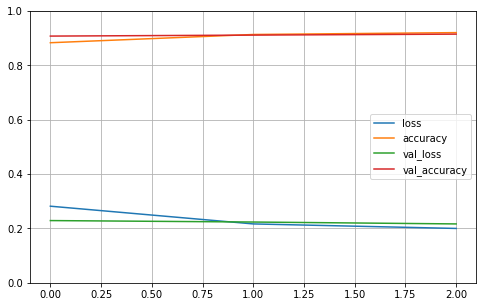

In [144]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [145]:
model.evaluate(X_test, y_test)

1250/1250 [==============================] - 66s 52ms/step - loss: 0.2193 - accuracy: 0.9107


[0.21929104626178741, 0.9106749892234802]

In [158]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

d:\installation\python38-64\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

       False       0.91      0.91      0.91     20020
        True       0.91      0.91      0.91     19980

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



In [220]:
predicted_classes_reshaped = np.reshape(y_pred, 40000)
correct = np.nonzero(predicted_classes_reshaped == y_test)[0]
incorrect = np.nonzero(predicted_classes_reshaped != y_test)[0]

In [214]:
correct

array([    0,     1,     2, ..., 39997, 39998, 39999], dtype=int64)

In [221]:
for j, correct in enumerate(correct[0:5]):
    predicted = class_name[predicted_classes_reshaped[correct]]
    actual = class_name[np.bool(y_test[correct])]
    human_readable_review = decode_review(X_test[correct])
    print("Correctly classified Test Review ["+str(j+1)+"]")
    print("Test Review #"+ str(correct)+": Predicted ["+str(predicted)+"] Actual ["+str(actual)+"]")
    print("Review Text: "+ human_readable_review.replace("?", ""))
    print("")

Correctly classified Test Review [1]
Test Review #0: Predicted [Negative] Actual [Negative]
Review Text:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [222]:
for j, incorrect in enumerate(incorrect[0:5]):
    predicted = class_name[predicted_classes_reshaped[incorrect]]
    actual = class_name[np.bool(y_test[incorrect])]
    human_readable_review = decode_review(X_test[incorrect])
    print("Correctly classified Test Review ["+str(j+1)+"]")
    print("Test Review #"+ str(correct)+": Predicted ["+str(predicted)+"] Actual ["+str(actual)+"]")
    print("Review Text: "+ human_readable_review.replace("?", ""))
    print("")

Correctly classified Test Review [1]
Test Review #4: Predicted [Negative] Actual [Positive]
Review Text:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Test with own input

In [269]:
sequence = tokenizer.texts_to_sequences(['I love the beautiful product so much'])
sequence_pad = pad_sequences(sequence, maxlen=MAX_LENGTH)
# sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

print(str(model.predict(sequence_pad)[0][0])+" - "+str(class_name[(model.predict(sequence_pad) > 0.5).astype("int32")[0][0]]))
# print(model.predict(sequence_pad))
# ).argmax(axis=1)[0]

0.95826024 - Positive


# Temp